# Convolutional AutoEncoder for image generation

In [3]:
import numpy
import tensorflow

In [ ]:
!unzip interim.zip

#Encoder

#Decoder

#Autoencoder

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# 1. Definir la entrada
input_shape = (256, 256, 3)
inputs = layers.Input(shape=input_shape)

# 2. Capas de Aumentación de Datos (Solo se activan durante el entrenamiento)
# Esto multiplicará "virtualmente" tus 180 imágenes haciendo pequeñas modificaciones.
data_augmentation_layer1 = layers.RandomFlip("horizontal")(inputs) # Flipeamos las imagenes sobre el eje horizontal
data_augmentation_layer2 = layers.RandomTranslation(height_factor=0.05, width_factor=0.05)(data_augmentation_layer1) # Mueve la imagen tanto vertical como horizontalmente
data_augmentation_layer3 = layers.RandomZoom(height_factor=(-0.05, -0.05))(data_augmentation_layer2) # Ligero zoom in/out


# ==========================================
# 3. ENCODER (Comprimiendo la imagen)
# ==========================================
# Reducimos dimensiones espaciales, aumentamos profundidad (filtros)
# 256x256 -> 128x128
encoder_layer1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(data_augmentation_layer3)
encoder_layer2 = layers.MaxPooling2D((2, 2), padding='same')(encoder_layer1)

# 128x128 -> 64x64
encoder_layer3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_layer2)
encoder_layer4 = layers.MaxPooling2D((2, 2), padding='same')(encoder_layer3)

# 64x64 -> 32x32
encoder_layer5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder_layer4)
encoder_layer6 = layers.MaxPooling2D((2, 2), padding='same')(encoder_layer5)

# 32x32 -> 16x16
encoder_layer7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoder_layer6)
encoder_layer8 = layers.MaxPooling2D((2, 2), padding='same', name='cuello_de_botella')(encoder_layer7)

# Aquí en el "cuello_de_botella", la imagen es un tensor de 16x16x256.
# Hemos comprimido la información espacial pero capturado mucha profundidad (patrones).

# ==========================================
# 4. DECODER (Reconstruyendo la imagen)
# ==========================================
# 16x16 -> 32x32
decoder_layer1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoder_layer8)
decoder_layer2 = layers.UpSampling2D((2, 2))(decoder_layer1)

# 32x32 -> 64x64
decoder_layer3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoder_layer2)
decoder_layer4 = layers.UpSampling2D((2, 2))(decoder_layer3)

# 64x64 -> 128x128
decoder_layer5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoder_layer4)
decoder_layer6 = layers.UpSampling2D((2, 2))(decoder_layer5)

# 128x128 -> 256x256
decoder_layer7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoder_layer6)
decoder_layer8 = layers.UpSampling2D((2, 2))(decoder_layer7)

# Capa Final de Salida
# Usamos 'sigmoid' asumiendo que tus imágenes de entrada estarán normalizadas entre 0 y 1.
decoder_layer9 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='salida_reconstruccion')(decoder_layer8)

# ==========================================
# 5. CONSTRUCCIÓN DEL MODELO
# ==========================================
autoencoder = Model(inputs, decoder_layer9, name="Autoencoder_Camisetas_256x256")

# Compilación
# El optimizador Adam funciona muy bien por defecto.
# Usamos Error Cuadrático Medio (MSE) como base.
autoencoder.compile(optimizer='adam', loss='mse')

# Ver el resumen de la arquitectura
autoencoder.summary()

Model: "Autoencoder_Camisetas_256x256"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 256, 256, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cuello_de_botella               │ (None, 16, 16, 256)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida_reconstruccion (Conv2D)  │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,366,659 (5.21 MB)

 Trainable params: 1,366,659 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 1. Definir la ruta y parámetros
# Cambia esto por la ruta real donde está tu carpeta de imágenes
ruta_carpeta = "./interim"
tamano_lote = 16 # Un batch de 16 o 32 es ideal para datasets pequeños

# 2. Cargar las imágenes desde el directorio
dataset = tf.keras.utils.image_dataset_from_directory(
    ruta_carpeta,
    labels=None,           # Fundamental: como es un autoencoder, no tenemos "clases"
    color_mode='rgb',
    batch_size=tamano_lote,
    image_size=(256, 256), # Redimensiona automáticamente si alguna imagen varía
    shuffle=True           # Mezcla las imágenes para un mejor entrenamiento
)

# 3. Función de Preprocesamiento (Normalización y Objetivo)
def preparar_para_autoencoder(imagen):
    # Convertir a float32 y normalizar al rango [0, 1]
    imagen_normalizada = tf.cast(imagen, tf.float32) / 255.0

    # Un autoencoder intenta predecir su propia entrada.
    # Por lo tanto, devolvemos (Entrada, Objetivo) -> (imagen, imagen)
    return imagen_normalizada, imagen_normalizada

# 4. Aplicar la transformación y optimizar el rendimiento
# AUTOTUNE permite a TensorFlow gestionar los hilos de la CPU dinámicamente
autoencoder_dataset = dataset.map(
    preparar_para_autoencoder,
    num_parallel_calls=tf.data.AUTOTUNE
)

# prefetch carga el siguiente lote en memoria mientras la GPU entrena el lote actual
autoencoder_dataset = autoencoder_dataset.prefetch(tf.data.AUTOTUNE)

print("¡Pipeline de datos listo!")

Found 180 files.
¡Pipeline de datos listo!


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Configuramos el Early Stopping
# Monitorizamos la pérdida ('loss'). Si no mejora en 15 épocas, se detiene.
# restore_best_weights=True asegura que nos quedamos con el mejor modelo, no con el último.
parada_temprana = EarlyStopping(
    monitor='loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Definimos un número alto de épocas; el Early Stopping decidirá cuándo parar
epocas = 150

print("Iniciando el entrenamiento del Autoencoder...")
# Entrenamos el modelo pasando nuestro pipeline de datos
historial = autoencoder.fit(
    autoencoder_dataset,
    epochs=epocas,
    callbacks=[parada_temprana]
)
print("¡Entrenamiento finalizado!")

Iniciando el entrenamiento del Autoencoder...
Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 0.1552
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0650
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0583
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0639
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0568
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0533
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0534
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0530
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0499
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0521
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0521
Epoch 12/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0509
Epoch 13/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0507
Epoch 14/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0489
Epoch 15/

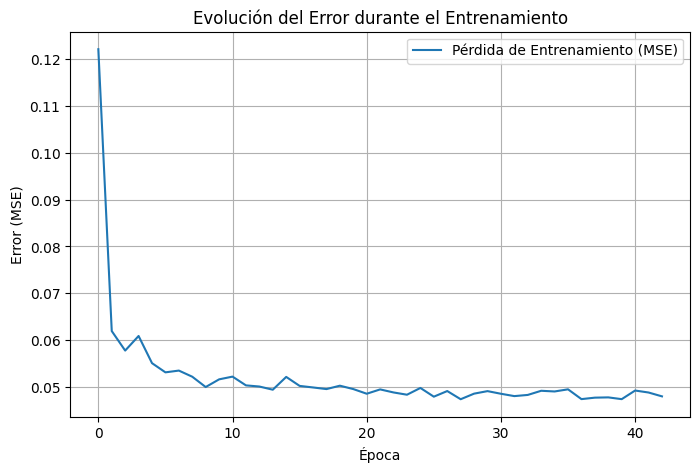

In [7]:
# Graficar la curva de pérdida (MSE)
plt.figure(figsize=(8, 5))
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento (MSE)')
plt.title('Evolución del Error durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


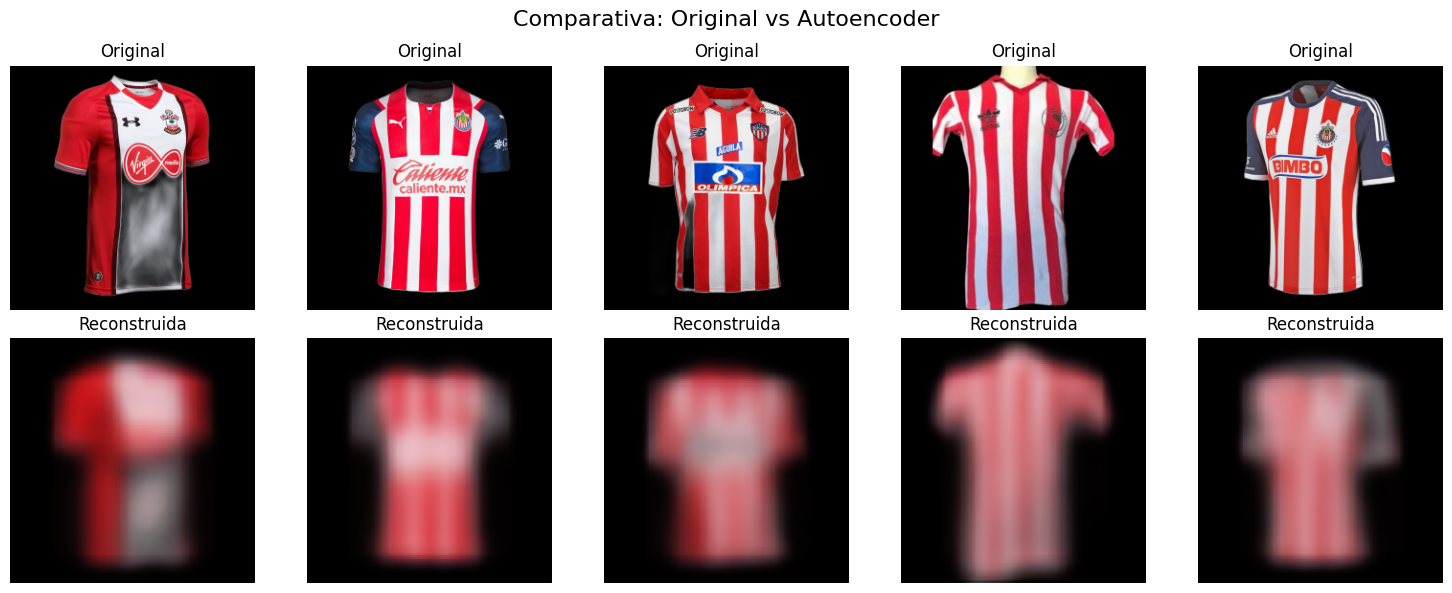

In [8]:
def visualizar_reconstrucciones(modelo, dataset, num_imagenes=5):
    """
    Toma un lote de imágenes del dataset, las pasa por el autoencoder
    y grafica la imagen original vs la reconstruida.
    """
    # Tomamos solo el primer lote (batch) de nuestro dataset
    for imagenes_originales, _ in dataset.take(1):

        # El modelo predice (reconstruye) las imágenes
        reconstrucciones = modelo.predict(imagenes_originales)

        plt.figure(figsize=(15, 6))
        for i in range(num_imagenes):
            # Fila superior: Imágenes Originales
            ax = plt.subplot(2, num_imagenes, i + 1)
            plt.imshow(imagenes_originales[i].numpy())
            plt.title("Original")
            plt.axis("off")

            # Fila inferior: Imágenes Reconstruidas
            ax = plt.subplot(2, num_imagenes, i + 1 + num_imagenes)
            plt.imshow(reconstrucciones[i])
            plt.title("Reconstruida")
            plt.axis("off")

        plt.suptitle("Comparativa: Original vs Autoencoder", fontsize=16)
        plt.tight_layout()
        plt.show()
        break # Solo necesitamos iterar una vez para sacar un lote

# Llamamos a la función para ver los resultados
visualizar_reconstrucciones(autoencoder, autoencoder_dataset)